## Earth's Atmospheric Composition: Computer Laboratory #2

Paul Palmer, University of Edinburgh (paul.palmer@ed.ac.uk)

### Contents:

The learning objectives of this lab are:
1. Understand about the global distribution of atmospheric CO$_2$
2. Understand what drives seasonal and hemispheric variations in atmospheric CO$_2$.
3. Appreciate model error.

This is a [Jupyter](https://www.jupyter.org "Jupyter's Homepage") notebook, which allows you to use the power of Python without much knowledge of the language.

**To run the code below:**
1. Click on the cell to select it.
2. Press SHIFT+ENTER on your keyboard or press the play button () in the toolbar above.

### Exercise #4: Global 3-D model output

Below is some code to plot and analyze output from the global 3-D [GEOS-Chem model](http://acmg.seas.harvard.edu/geos/index.html "GEOS-Chem Homepage"). It is a state-of-the-science community model that has been used extensively to interpret aircraft, ground-based and space-borne observations of GHGs. It is an atmospheric transport model, which means it uses pre-computered analyzed meteorology taken from large-scale weather prediction models that include lots of data to ensure the physical parameters closely describe the observed weather patterns. GEOS-Chem describes the physical, chemical and biological processes associated with (in this example) atmospheric CO$_2$.


The code reads in output from a model simulation that has been run at a spatial resolution of 4 degrees (latitude) by 5 degrees (longitude), which is approximately 400 km by 500 km. The temporal resolution is weekly, which is sufficient to observe the seasonal cycle of atmospheric CO$_2$. 

#### Activity (Geographical and seasonal variations)
1. The two sliders refer to the time (weeks 1-52) and the vertical level (1 = near surface, 46 = top of the atmosphere). There are approximately 15 layers in the troposphere. Ignore values above level 15. 
   * Look at the lowest level and adjust time from January through to December. What do you notice in the Northern hemisphere and Southern hemisphere?
   * Look at January, July and December but move up through the atmosphere. What do you find? What implications does this have for observing atmospheric CO$_2$?

#### Activity (CO$_2$ from individual sectors)
As well as the model tracking total atmospheric CO$_2$ we can also track the individual constituents. For example, we can track fossil fuel CO$_2$, biomass burning CO$_2$, terrestrial biosphere CO$_2$, and the ocean biosphere CO$_2$. 

1. In the code add a line to read in 'fossil_co2', 'ocean_co2, 'bio_co2, or 'bb_co2' to see these constituents. 
2. What do you find? In your opinion, which of the sectors is responsible for driving atmospheric variations of CO2? 
3. Does your answer change if you look at the surface and higher up in the atmosphere?

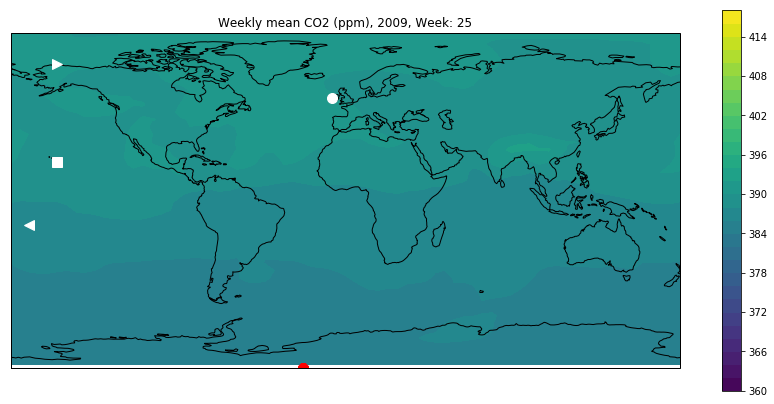

In [21]:
%matplotlib inline
from ipywidgets import widgets, interact, interactive
from IPython.display import clear_output, display, HTML
from netCDF4 import Dataset
import numpy as np
import pylab as plt
from __future__ import division
from __future__ import print_function
import cartopy.crs as ccrs

f = Dataset('/jupyter/ppalmer/datafiles/tagged_co2_2009_weekly.nc')

co2   = f.variables['total_co2']
ffco2 = f.variables['fossil_co2']
bbco2 = f.variables['bb_co2']
bsco2 = f.variables['bio_co2']
occo2 = f.variables['ocean_co2']

lat = f.variables['latitude'][:]
lon = f.variables['longitude'][:]


# ppm
co2   = np.array(co2)/1e-6 # If you plot individual sector remember to change the contour levels
ffco2 = np.array(ffco2)/1e-6 - 100. # remove 100 ppm offset
bbco2 = np.array(bbco2)/1e-6 - 100.
bsco2 = np.array(bsco2)/1e-6 - 100.
occo2 = np.array(occo2)/1e-6 - 100.

lon2, lat2 = np.meshgrid(lon,lat)

def plotSAT(time,level):

    # Establish a map to plot atmospheric CO2.
    fig = plt.figure(figsize=(15,7))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()

    # Plot the data
    levels=np.arange(30)*2+360.
    # ffco2
    #levels = np.arange(30)*0.5+100.
    # bbco2
    #levels = np.arange(30)*0.5+100.
    # occo2
    #levels = np.arange(10)-5
    # bsco2
    #levels = np.arange(60)-30.
    
    # Change the CO2 field to be plotted
    #plt.contourf(lon2,lat2,occo2[time,level,:,:],levels)
    #plt.contourf(lon2,lat2,bsco2[time,level,:,:],levels)
    plt.contourf(lon2,lat2,co2[time,level,:,:],levels)

    plt.colorbar()
    plt.title('Weekly mean CO2 (ppm), 2009, Week: '+str(time))

    #Mauna Loa, Hawaii
    lonuse = -155.6 # degrees W
    latuse = 19.5   # degrees N
    plt.plot(lonuse, latuse, 'ws', markersize=10)
    #Barrow, Alaska
    lonuse = -155.6 # degrees W
    latuse = 71.3   # degrees N
    plt.plot(lonuse,latuse, 'w>', markersize=10)
    #America Samoa
    lonuse = -170.5 # degrees W
    latuse = -14.2  # degrees N
    plt.plot(lonuse,latuse, 'w<', markersize=10)
    #Mace Head 
    lonuse = -9.899 # degrees W
    latuse = 53.326 # degrees N
    plt.plot(lonuse,latuse, 'wo', markersize=10)
    # South Pole
    lonuse = -24.800 # degrees W
    latuse = -89.980 # degrees N
    plt.plot(lonuse,latuse, 'r8', markersize=10)
    
interactive(plotSAT,time=(0,51),level=(0,46,1))



#### Activity (Timeseries)

I have superimposed four symbols on the 2-D map above: the rightward arrow head, the square, the leftward arrow head, and the red circle denote the position of Barrow Alaska, Mauna Loa, American Samoa, and South Pole stations, respectively. These represent four of the [NOAA observatories](http://www.esrl.noaa.gov/gmd/obop/) that are intentionally located far from local sources they can sample atmospheric GHGs representative of large spatial scales. 

Below is some code that extracts the full annual time series from a particular geographical location defined by the latitude and longitude. I have provided some code for Mauna Loa in Hawaii.

1) What do you notice about the model agreement with data collected over Hawaii? What does it mean in terms of the model mass balance?

2) Observations collected at Mauna Loa are typically assumed to reflect global changes in atmospheric CO2. Assuming a relationship of 1 ppm ~ 2 Petagrams of carbon how wrong is the model?  

Cut 'n paste the code used to plot Mauna Loa and adapt it so you can plot the South Pole, Antarctica; American Samoa, USA, Barrow Alaska, USA; and Mace Head Ireland. The sideid values for these sites are 'spo', 'smo', 'brw', and 'mhd', respectively.

3) What do you notice about the different seasonal cycles? What is responsible for the differences?

4) Repeat question 2) for the other sites? Are some sites better modelled that other? What might influence the ability of the model to describe data at different sites?  

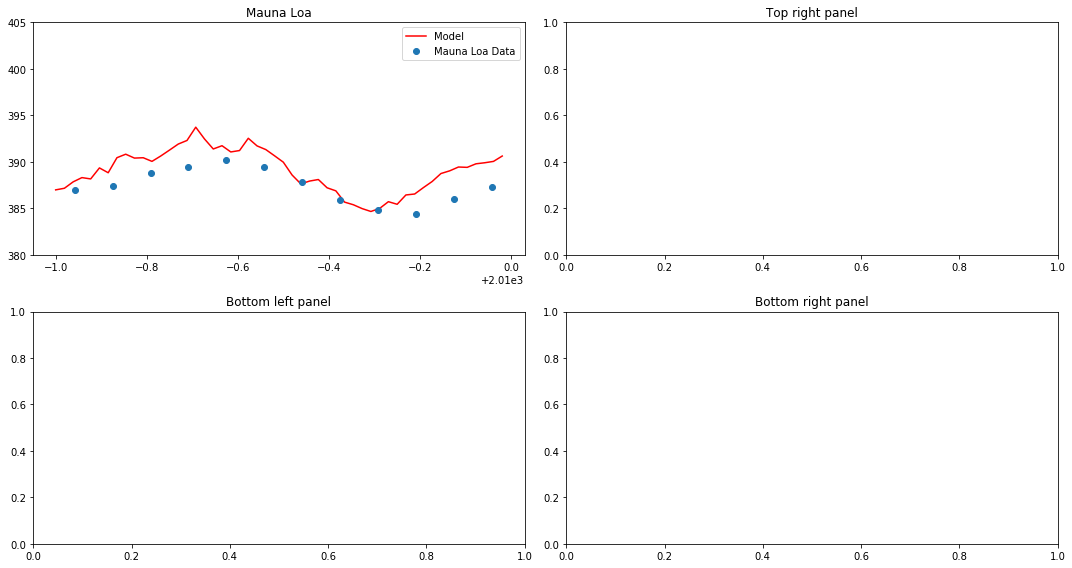

In [22]:
def readdata(siteid, olon, olat):
    f = open('/jupyter/ppalmer/datafiles/co2_monmean_'+siteid+'_pip.txt','r')
    time = []
    co2  = []
    ind  = 0
    for line in f:
        p = line.split()
        time.append(2009+np.float(ind+0.5)/12.) # hard-wired
        co2.append(np.float(p[0]))
        ind += 1
    f.close()
    
    #get model grid indices corresponding to site lat, lon
    dlat = 4.0
    dlon = 5.0
    idy = int(np.ceil((olat+90)/dlat))
    idx = int(np.ceil((olon+180)/dlon))
    
    return time, co2, idx, idy



def plotdata(ax,modeltime,modeldata,noaatime,noaadata,usetitle):
    ax.set_title(usetitle)
    ax.plot(modeltime,modeldata,'r',label='Model')
    ax.plot(noaatime,noaadata,'o',label=usetitle+' Data')
    ax.set_ylim([380,405])
    ax.legend(loc='upper right')


    
# Establish figure environment   
fig = plt.figure(figsize=(15,8))


# Read NOAA data

#===============
# Mauna Loa
#===============
olonuse = -155.6 # degrees W
olatuse = 19.5   # degrees N
siteid = 'mlo'
mlowk, mloco2, idx, idy = readdata(siteid, olonuse, olatuse)

# Extract corresponding model data
modelco2 = co2[:,0,idy,idx]
modelwk  = np.arange(len(modelco2))/52.+2009

# Plot data
ax1 = fig.add_subplot(221)
plotdata(ax1,modelwk,modelco2,mlowk,mloco2,'Mauna Loa')




plt.subplot(222)
plt.title('Top right panel')

plt.subplot(223)
plt.title('Bottom left panel')

plt.subplot(224)
plt.title('Bottom right panel')

plt.tight_layout()



In [ ]:
#